*Full Name:* [محمدمهدی شریف‌بیگی][(sharifbeigymohammad@gmail.com)](https://github.com/MohammadMahdi-Sharifbeigy)

*Student Number:* 402300068

# Neural Network Workshop Project
## Artificial Neural Networks - IUST Winter 1403

### Project Objectives
- Implement MLP (Multilayer Perceptron) from scratch
- Data preprocessing
- Linear regression
- Parameter initialization
- Forward propagation
- Activation function implementation
- Loss calculation
- Regularization
- Backpropagation
- Test on MNIST dataset

In [1]:
# !pip install torch torchvision tqdm scikit-learn

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
from tqdm.notebook import tqdm
from copy import deepcopy
import seaborn as sns
import torchvision
import torchvision.transforms as transforms
import torch
import time
from sklearn.utils import shuffle

try:
    import plotly.graph_objects as go
except ModuleNotFoundError:
    print("Plotly not found. Attempting to install...")
    
    try:
        import sys
        import subprocess
        
        subprocess.check_call([sys.executable, "-m", "pip", "install", "plotly"])
        
        import plotly.graph_objects as go
    except Exception as e:
        print(f"Failed to install Plotly. Error: {e}")
        print("Please install Plotly manually using: pip install plotly")

%matplotlib inline

seed = 1
np.random.seed(seed)

In [3]:
def normalization(X):
    """
    Args:
        'X': numpy ndarray
    Returns:
        'X_norm': normalized X also in numpy ndarray format
    """
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    if np.isscalar(std_X) and std_X == 0:
        std_X = 1
    elif isinstance(std_X, np.ndarray):
        std_X[std_X == 0] = 1
    X_norm = (X - mean_X) / std_X

    return X_norm

    raise NotImplementedError()

In [4]:
def standardize(data):
    """
    Standardize the input data by subtracting the mean and dividing by the standard deviation.
    
    Parameters:
    -----------
    data : list, array-like, or numpy.ndarray
        The input data to be standardized
    
    Returns:
    --------
    numpy.ndarray
        The standardized data with mean 0 and standard deviation 1
    """
    data_array = np.array(data, dtype=float)
    
    mean = np.mean(data_array)
    
    # Calculate the standard deviation
    std_dev = np.std(data_array)
    
    if std_dev == 0:
        return np.zeros_like(data_array)  # Return all zeros if standard deviation is zero
    
    standardized_data = (data_array - mean) / std_dev
    
    return standardized_data

In [5]:
np.random.seed(seed)
x = np.random.randint(0, 100, size = 10)
x = normalization(x)
assert np.allclose(x[1], -0.8183755)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [6]:
def xavier_init(X, y):
    """
    Initialize weights and biases for a neural network layer using Xavier/Glorot initialization.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Input data matrix, shape (n_samples, n_features)
    y : numpy.ndarray
        Output target matrix, shape (n_samples, n_outputs)
    
    Returns:
    --------
    weights : numpy.ndarray
        Weight matrix with shape (n_features, n_outputs)
    bias : numpy.ndarray
        Bias vector with shape (1, n_outputs)
    """
    num_features = X.shape[1]
    output_size = y.shape[1]
    
    W = np.random.rand(num_features, output_size)
    
    b = np.zeros((1, output_size))
    
    return W, b

In [7]:
# sample test case
W_check, b_check = xavier_init(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
np.random.seed(seed)
W_check, b_check = xavier_init(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
assert W_check.shape == (2,1)
assert b_check.shape == (1,1)
assert np.allclose(W_check[0],[0.417022004702574])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [8]:
def forward(X, W, b):
    """
    Args:
    'X': ndarray of shape (m,no.of features)
    'W': ndarray of shape (no. of features, output_size)
    'b': ndarray of shape (1, output_size)
    Returns:
    calculated Y_pred value using X,W and b
    """
    Y_pred = np.dot(X, W) + b
    return Y_pred
    raise NotImplementedError()

In [9]:
seed = 1
np.random.seed(seed)
X_test = np.random.randn(2,1)
np.random.seed(seed+1)
W_test = np.random.randn(1,2)
np.random.seed(seed+2)
b_test = np.random.randn(1,2)
forward_test = forward(X_test, W_test, b_test)
assert np.allclose(forward_test, [[1.1116698 , 0.34511309],[2.04358276, 0.47093144]])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

def load_mnist():
    """
    Load the MNIST dataset
    """
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
    
    # Convert DataFrame to numpy array
    X = X.to_numpy().astype('float32')
    y = y.to_numpy().astype('int32')
    
    # Use custom normalization instead of simple division
    X = normalization(X)
    
    # Reshape if needed
    if len(X.shape) == 2:
        X = X.reshape(X.shape[0], 28, 28, 1)
    
    return X, y

def preprocess_data(X, y, test_size=0.2, random_state=42):
    """
    Split and preprocess the data
    """
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Reshape input data to 2D if it's not already
    if len(X_train.shape) > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Apply standardization to features
    # Note: We'll apply standardization per sample, not per feature as is typically done
    for i in range(X_train.shape[0]):
        X_train[i] = standardize(X_train[i])
    
    for i in range(X_test.shape[0]):
        X_test[i] = standardize(X_test[i])
    
    return X_train, X_test, y_train, y_test
def one_hot_encode(y, num_classes=None):
    """
    One-hot encode the target values
    """
    if num_classes is None:
        num_classes = np.max(y) + 1
    
    y_one_hot = np.zeros((y.shape[0], num_classes))
    y_one_hot[np.arange(y.shape[0]), y] = 1
    
    return y_one_hot

In [11]:
def initialize_parameters(layer_dims, initialization_method="he"):
    """
    Initialize the weights and biases for all layers
    
    Parameters:
    layer_dims -- List containing the dimensions of each layer
    initialization_method -- Method to use for weight initialization ('he', 'xavier', 'random')
    
    Returns:
    parameters -- Dictionary containing the initialized weights and biases
    """
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        if initialization_method == "he":
            # He initialization (good for ReLU)
            parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2. / layer_dims[l-1])
            parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        elif initialization_method == "xavier":
            # Xavier initialization (good for sigmoid/tanh)
            parameters[f'W{l}'], parameters[f'b{l}'] = xavier_init(layer_dims[l-1], layer_dims[l])
        elif initialization_method == "random":
            # Random initialization
            parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
            parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        else:
            raise ValueError("Initialization method not recognized")
    
    return parameters

# Activation Functions

## Sigmoid Activation Function

The sigmoid function maps any input value to a value between 0 and 1, making it useful for binary classification problems.

### Formula:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

### Derivative:
$$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$$

### Shapes:
- Input Z: Shape (n, m) where n is the number of neurons in the current layer and m is the batch size
- Output A: Same shape as Z: (n, m)
- Cache: Stores Z with shape (n, m) for backpropagation

In [1]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ

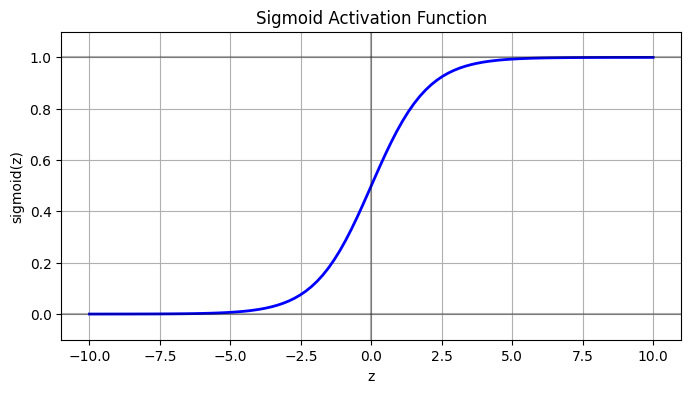

In [13]:
z = np.linspace(-10, 10, 100)
sigmoid_z = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoid_z, 'b-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.show()

## Tanh Activation Function

The hyperbolic tangent function (tanh) maps input values to a range between -1 and 1. It's similar to the sigmoid function but centered at 0.

### Formula:
$$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

### Derivative:
$$\tanh'(z) = 1 - \tanh^2(z)$$

In [14]:
def tanh(Z):
    A = np.tanh(Z)
    cache = Z
    return A, cache

def tanh_backward(dA, cache):
    Z = cache
    A = np.tanh(Z)
    dZ = dA * (1 - np.power(A, 2))
    return dZ

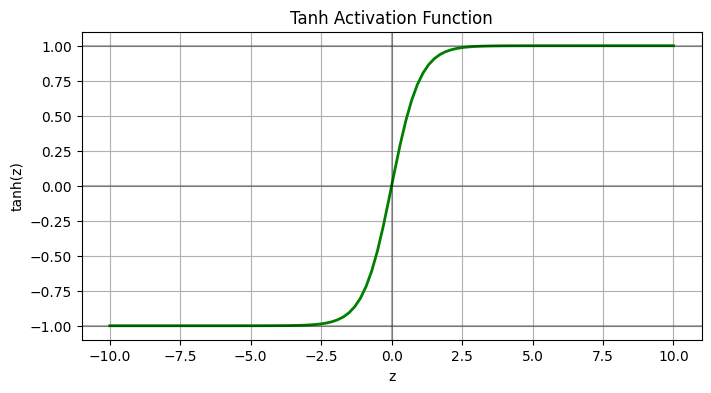

In [15]:
z = np.linspace(-10, 10, 100)
tanh_z = np.tanh(z)

plt.figure(figsize=(8, 4))
plt.plot(z, tanh_z, 'g-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=-1, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('z')
plt.ylabel('tanh(z)')
plt.title('Tanh Activation Function')
plt.grid(True)
plt.ylim(-1.1, 1.1)
plt.show()

## ReLU (Rectified Linear Unit) Activation Function

ReLU is one of the most widely used activation functions in deep learning, particularly for hidden layers. It outputs the input directly if positive, otherwise, it outputs zero.

### Formula:
$$\text{ReLU}(z) = \max(0, z)$$

### Derivative:
$$\text{ReLU}'(z) = \begin{cases} 
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases}$$

### Shapes:
- Input Z: Shape (n, m) where n is the number of neurons in the current layer and m is the batch size
- Output A: Same shape as Z: (n, m)
- Cache: Stores Z with shape (n, m) for backpropagation

In [ ]:
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

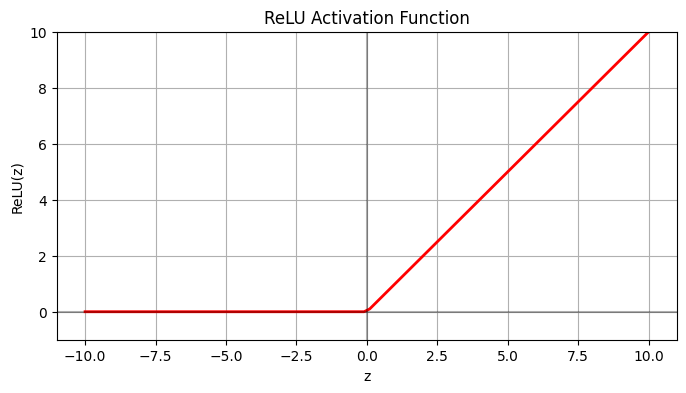

In [17]:
z = np.linspace(-10, 10, 100)
relu_z = np.maximum(0, z)

plt.figure(figsize=(8, 4))
plt.plot(z, relu_z, 'r-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.ylim(-1, 10)
plt.show()

## Softmax Activation function
The softmax function converts a vector of real numbers into a probability distribution. It's commonly used in the output layer for multi-class classification problems.

### Formula:
$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

Where K is the number of classes.

### Derivative:
The derivative of softmax is more complex and is usually combined with cross-entropy loss for backpropagation.

### Shapes:
- Input Z: Shape (n_classes, m) where n_classes is the number of output classes and m is the batch size
- Output A: Same shape as Z: (n_classes, m), representing probability distributions over classes
- Cache: Stores Z with shape (n_classes, m) for backpropagation

In [18]:
def softmax(Z):
    # Shift Z for numerical stability
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    cache = Z
    return A, cache

def softmax_backward(dA, cache):
    # For softmax with cross-entropy loss, this is typically simplified
    return dA

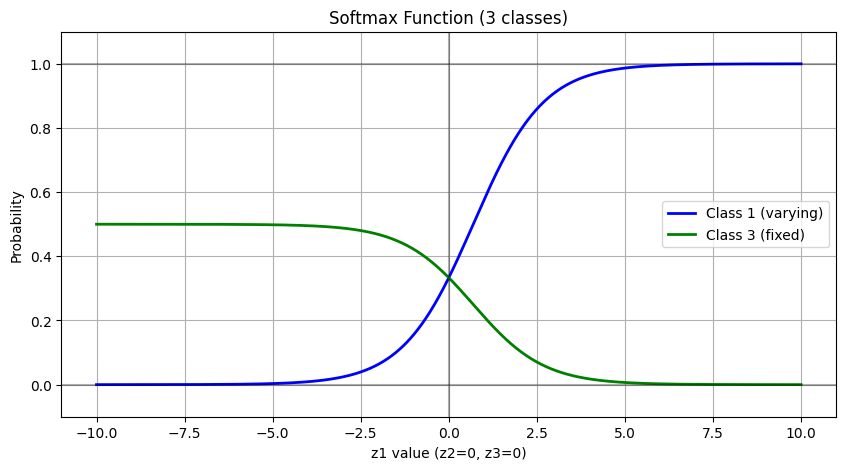

In [19]:
# Set up the values for three classes
z = np.linspace(-10, 10, 1000)
z1 = z  # Varying value
z2 = np.zeros_like(z)  # Fixed value
z3 = np.zeros_like(z)  # Fixed value

# Calculate softmax for all three classes
exp_z1 = np.exp(z1)
exp_z2 = np.exp(z2)
exp_z3 = np.exp(z3)
sum_exp = exp_z1 + exp_z2 + exp_z3

softmax_z1 = exp_z1 / sum_exp
softmax_z2 = exp_z2 / sum_exp
softmax_z3 = exp_z3 / sum_exp

plt.figure(figsize=(10, 5))
plt.plot(z, softmax_z1, 'b-', linewidth=2, label='Class 1 (varying)')
plt.plot(z, softmax_z3, 'g-', linewidth=2, label='Class 3 (fixed)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('z1 value (z2=0, z3=0)')
plt.ylabel('Probability')
plt.title('Softmax Function (3 classes)')
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

In [20]:
def linear_forward(A_prev, W, b):
    """
    Linear part of a layer's forward propagation
    
    Parameters:
    A_prev -- activations from previous layer
    W -- weights matrix
    b -- bias vector
    
    Returns:
    Z -- the input of the activation function
    cache -- a tuple containing A_prev, W, b for backward propagation
    """
    Z = np.dot(W, A_prev) + b
    cache = (A_prev, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Forward propagation for one layer
    
    Parameters:
    A_prev -- activations from previous layer
    W -- weights matrix
    b -- bias vector
    activation -- the activation to be used ("sigmoid", "relu", or "softmax")
    
    Returns:
    A -- the output of the activation function
    cache -- tuple containing the linear_cache and the activation_cache
    """
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)
    elif activation == "softmax":
        A, activation_cache = softmax(Z)
    else:
        raise ValueError("Activation function not recognized")
    
    cache = (linear_cache, activation_cache)
    
    return A, cache

def L_model_forward(X, parameters, hidden_activations="relu", output_activation="softmax"):
    """
    Forward propagation for the entire L-layer model
    
    Parameters:
    X -- input data, shape (input size, number of examples)
    parameters -- dictionary containing the parameters
    hidden_activations -- activation function to use for hidden layers
    output_activation -- activation function to use for output layer
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches for all layers
    """
    caches = []
    A = X
    L = len(parameters) // 2  # number of layers
    
    # Hidden layers
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(
            A_prev, 
            parameters[f'W{l}'], 
            parameters[f'b{l}'], 
            hidden_activations
        )
        caches.append(cache)
    
    # Output layer
    AL, cache = linear_activation_forward(
        A, 
        parameters[f'W{L}'], 
        parameters[f'b{L}'], 
        output_activation
    )
    caches.append(cache)
    
    return AL, caches

In [21]:
def compute_cost(AL, Y, parameters=None, lambd=0):
    """
    Compute the cross-entropy cost
    
    Parameters:
    AL -- probability vector of shape (num_classes, number of examples)
    Y -- true labels vector of shape (num_classes, number of examples)
    parameters -- dictionary containing the parameters (optional, for L2 regularization)
    lambd -- regularization parameter (default is 0)
    
    Returns:
    cost -- cross-entropy cost with regularization
    """
    m = Y.shape[1]
    
    # Cross-entropy cost
    cost = -np.sum(Y * np.log(AL + 1e-8)) / m
    
    # Add L2 regularization if parameters are provided
    if parameters is not None and lambd > 0:
        L = len(parameters) // 2
        l2_cost = 0
        for l in range(1, L + 1):
            l2_cost += np.sum(np.square(parameters[f'W{l}']))
        cost += (lambd / (2 * m)) * l2_cost
    
    return cost

def mse_cost(AL, Y):
    """
    Compute the Mean Squared Error cost
    
    Parameters:
    AL -- output of the network
    Y -- true labels
    
    Returns:
    cost -- MSE cost
    """
    m = Y.shape[1]
    cost = np.sum((AL - Y) ** 2) / (2 * m)
    return cost

In [22]:
def linear_backward(dZ, cache, lambd=0):
    """
    Linear part of backward propagation for a single layer
    
    Parameters:
    dZ -- gradient of the cost with respect to the linear output
    cache -- tuple of (A_prev, W, b) from forward propagation
    lambd -- regularization parameter
    
    Returns:
    dA_prev -- gradient of the cost with respect to the activation of the previous layer
    dW -- gradient of the cost with respect to W
    db -- gradient of the cost with respect to b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ, A_prev.T) / m + (lambd / m) * W
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation, lambd=0):
    """
    Backward propagation for one layer
    
    Parameters:
    dA -- post-activation gradient for current layer
    cache -- tuple of (linear_cache, activation_cache)
    activation -- the activation to be used ("sigmoid", "relu", or "softmax")
    lambd -- regularization parameter
    
    Returns:
    dA_prev -- gradient of the cost with respect to the activation of the previous layer
    dW -- gradient of the cost with respect to W
    db -- gradient of the cost with respect to b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
    else:
        raise ValueError("Activation function not recognized")
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache, lambd)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches, hidden_activations="relu", output_activation="softmax", lambd=0):
    """
    Backward propagation for the entire L-layer network
    
    Parameters:
    AL -- output of the forward propagation (L_model_forward)
    Y -- true labels
    caches -- list of caches from L_model_forward
    hidden_activations -- activation function used in hidden layers
    output_activation -- activation function used in output layer
    lambd -- regularization parameter
    
    Returns:
    grads -- dictionary with the gradients
    """
    grads = {}
    L = len(caches)  # number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)  # ensure Y has the same shape as AL
    
    # Initialize the backpropagation
    if output_activation == "softmax":
        # Gradient of softmax with cross-entropy can be simplified
        dAL = AL - Y
    else:
        # For other activation functions
        dAL = -(np.divide(Y, AL + 1e-8) - np.divide(1 - Y, 1 - AL + 1e-8))
    
    # Last layer (different activation)
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(
        dAL, current_cache, output_activation, lambd
    )
    grads[f"dA{L-1}"] = dA_prev_temp
    grads[f"dW{L}"] = dW_temp
    grads[f"db{L}"] = db_temp
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(
            grads[f"dA{l+1}"], current_cache, hidden_activations, lambd
        )
        
        grads[f"dA{l}"] = dA_prev_temp
        grads[f"dW{l+1}"] = dW_temp
        grads[f"db{l+1}"] = db_temp
    
    return grads

In [23]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Parameters:
    parameters -- dictionary containing the parameters
    grads -- dictionary containing the gradients
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    parameters -- dictionary containing the updated parameters
    """
    L = len(parameters) // 2  # number of layers
    
    for l in range(1, L + 1):
        parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate * grads[f"dW{l}"]
        parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate * grads[f"db{l}"]
    
    return parameters

def mini_batch_sgd(X, Y, parameters, layer_dims, learning_rate=0.01, num_epochs=100, 
                  batch_size=64, hidden_activations="relu", output_activation="softmax",
                  lambd=0, print_cost=True):
    """
    Implements mini-batch SGD
    
    Parameters:
    X -- input data, shape (input size, number of examples)
    Y -- true labels, shape (output size, number of examples)
    parameters -- dictionary containing the parameters
    layer_dims -- list containing the dimensions of each layer
    learning_rate -- learning rate of the gradient descent update rule
    num_epochs -- number of epochs
    batch_size -- size of the mini-batches
    hidden_activations -- activation function for hidden layers
    output_activation -- activation function for output layer
    lambd -- regularization parameter
    print_cost -- if True, print the cost every 100 iterations
    
    Returns:
    parameters -- dictionary containing the updated parameters
    costs -- list of costs during training
    """
    costs = []
    m = X.shape[1]
    num_batches = m // batch_size
    
    for epoch in range(num_epochs):
        epoch_cost = 0
        
        # Shuffle the data
        permutation = np.random.permutation(m)
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[:, permutation]
        
        for b in range(num_batches):
            # Get mini-batch
            start_idx = b * batch_size
            end_idx = min((b + 1) * batch_size, m)
            X_batch = X_shuffled[:, start_idx:end_idx]
            Y_batch = Y_shuffled[:, start_idx:end_idx]
            
            # Forward propagation
            AL, caches = L_model_forward(
                X_batch, parameters, hidden_activations, output_activation
            )
            
            # Compute cost
            batch_cost = compute_cost(AL, Y_batch, parameters, lambd)
            epoch_cost += batch_cost
            
            # Backward propagation
            grads = L_model_backward(
                AL, Y_batch, caches, hidden_activations, output_activation, lambd
            )
            
            # Update parameters
            parameters = update_parameters(parameters, grads, learning_rate)
        
        # Calculate average cost for the epoch
        epoch_cost /= num_batches
        
        # Print and save cost
        if print_cost and epoch % 10 == 0:
            print(f"Cost after epoch {epoch}: {epoch_cost}")
        
        if epoch % 10 == 0:
            costs.append(epoch_cost)
    
    return parameters, costs

In [24]:
class MLP:
    """
    Multi-Layer Perceptron Neural Network implementation from scratch
    """
    
    def __init__(self, layer_dims, hidden_activations="relu", output_activation="softmax",
                initialization="he", learning_rate=0.01, num_epochs=100, batch_size=64,
                lambd=0, verbose=True, plot_interval=5):
        """
        Initialize the MLP model
        
        Parameters:
        layer_dims -- list containing the dimensions of each layer
        hidden_activations -- activation function for hidden layers
        output_activation -- activation function for output layer
        initialization -- weight initialization method
        learning_rate -- learning rate for optimization
        num_epochs -- number of training epochs
        batch_size -- size of mini-batches
        lambd -- regularization parameter
        verbose -- whether to print progress
        plot_interval -- number of epochs between plotting (default: 5)
        """
        self.layer_dims = layer_dims
        self.hidden_activations = hidden_activations
        self.output_activation = output_activation
        self.initialization = initialization
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.lambd = lambd
        self.verbose = verbose
        self.plot_interval = plot_interval
        self.parameters = None
        self.costs = []
        self.train_accuracies = []  # List to store training accuracies
        self.test_accuracies = []   # List to store test accuracies
    
    def fit(self, X, y, X_test=None, y_test=None):
        """
        Train the MLP model
        
        Parameters:
        X -- input data, shape (number of examples, input size) or (input_size, number of examples)
        y -- true labels
        X_test -- optional test data for tracking test accuracy per epoch
        y_test -- optional test labels for tracking test accuracy per epoch
        
        Returns:
        self -- the trained model
        """
        # Reshape X to (input_size, num_examples) if needed
        if X.shape[0] != self.layer_dims[0]:
            X = X.T
        
        # Prepare y (one-hot encoding if needed)
        num_classes = self.layer_dims[-1]
        if len(y.shape) == 1 or y.shape[1] == 1:
            Y = one_hot_encode(y, num_classes)
        else:
            Y = y
        
        # Reshape Y to (output_size, num_examples) if needed
        if Y.shape[0] != num_classes:
            Y = Y.T
        
        # Initialize parameters
        if self.parameters is None:
            self.parameters = initialize_parameters(self.layer_dims, self.initialization)
        
        # Prepare for epochs
        costs = []
        train_accuracies = []
        test_accuracies = []
        m = X.shape[1]
        num_batches = m // self.batch_size
        
        for epoch in range(self.num_epochs):
            epoch_cost = 0
            
            # Shuffle the data
            permutation = np.random.permutation(m)
            X_shuffled = X[:, permutation]
            Y_shuffled = Y[:, permutation]
            
            for b in range(num_batches):
                # Get mini-batch
                start_idx = b * self.batch_size
                end_idx = min((b + 1) * self.batch_size, m)
                X_batch = X_shuffled[:, start_idx:end_idx]
                Y_batch = Y_shuffled[:, start_idx:end_idx]
                
                # Forward propagation
                AL, caches = L_model_forward(
                    X_batch, self.parameters, 
                    self.hidden_activations, 
                    self.output_activation
                )
                
                # Compute cost
                batch_cost = compute_cost(AL, Y_batch, self.parameters, self.lambd)
                epoch_cost += batch_cost
                
                # Backward propagation
                grads = L_model_backward(
                    AL, Y_batch, caches, 
                    self.hidden_activations, 
                    self.output_activation, 
                    self.lambd
                )
                
                # Update parameters
                self.parameters = update_parameters(self.parameters, grads, self.learning_rate)
            
            # Calculate average cost for the epoch
            epoch_cost /= num_batches
            costs.append(epoch_cost)  # Save cost for each epoch now
            
            # For training accuracy, we need to be careful with shapes
            # We'll make predictions directly instead of using evaluate to avoid shape issues
            # Forward propagation on full training set
            AL_train, _ = L_model_forward(
                X, self.parameters, 
                self.hidden_activations, 
                self.output_activation
            )
            
            # Get predictions
            if self.output_activation == "softmax":
                predictions_train = np.argmax(AL_train, axis=0)
            else:
                predictions_train = (AL_train > 0.5).astype(int)
                
            # Get true labels in the right format
            if Y.shape[0] == num_classes:  # Y is one-hot encoded and transposed (output_size, n_samples)
                y_true_train = np.argmax(Y, axis=0)
            else:  # Y is one-hot encoded but not transposed (n_samples, output_size)
                y_true_train = np.argmax(Y, axis=1)
                
            # Calculate accuracy
            train_accuracy = np.mean(predictions_train == y_true_train)
            train_accuracies.append(train_accuracy)
            
            # Calculate test accuracy if test data is provided
            test_accuracy = None
            if X_test is not None and y_test is not None:
                # If X_test is in shape (n_samples, n_features), transpose it
                if X_test.shape[1] == self.layer_dims[0]:
                    X_test_reshaped = X_test.T
                else:
                    X_test_reshaped = X_test
                    
                # Forward propagation
                AL_test, _ = L_model_forward(
                    X_test_reshaped, self.parameters, 
                    self.hidden_activations, 
                    self.output_activation
                )
                
                # Get predictions
                if self.output_activation == "softmax":
                    predictions_test = np.argmax(AL_test, axis=0)
                else:
                    predictions_test = (AL_test > 0.5).astype(int)
                
                # Make sure y_test is in the right format (convert from one-hot if needed)
                if len(y_test.shape) > 1 and y_test.shape[1] > 1:
                    y_true_test = np.argmax(y_test, axis=1)
                else:
                    y_true_test = y_test
                
                # Calculate accuracy
                test_accuracy = np.mean(predictions_test == y_true_test)
                test_accuracies.append(test_accuracy)
            
            # Plot after every plot_interval epochs or after the last epoch
            if (epoch + 1) % self.plot_interval == 0 or epoch == self.num_epochs - 1:
                if X_test is not None and y_test is not None:
                    print(f"Epoch {epoch}/{self.num_epochs-1} - Cost: {epoch_cost:.4f} - Train Acc: {train_accuracy:.4f} - Test Acc: {test_accuracy:.4f}")
                else:
                    print(f"Epoch {epoch}/{self.num_epochs-1} - Cost: {epoch_cost:.4f} - Train Acc: {train_accuracy:.4f}")
        
        self.costs = costs
        self.train_accuracies = train_accuracies
        self.test_accuracies = test_accuracies

        self.plot_cost()
        self.plot_accuracy()
        
        return self
    
    def predict(self, X):
        """
        Use the trained model to predict
        
        Parameters:
        X -- input data, shape (number of examples, input size)
        
        Returns:
        predictions -- model predictions
        """
        # Reshape X to (input_size, num_examples) if needed
        if X.shape[0] != self.layer_dims[0]:
            X = X.T
        
        # Forward propagation
        AL, _ = L_model_forward(
            X, self.parameters, 
            self.hidden_activations, 
            self.output_activation
        )
        
        # Get predictions
        if self.output_activation == "softmax":
            predictions = np.argmax(AL, axis=0)
        else:
            predictions = (AL > 0.5).astype(int)
        
        return predictions
    
    def evaluate(self, X, y):
        """
        Evaluate model performance
        
        Parameters:
        X -- input data
        y -- true labels
        
        Returns:
        accuracy -- model accuracy
        """
        predictions = self.predict(X)
        
        # Convert y to 1D array of class indices if it's one-hot encoded
        if len(y.shape) > 1 and y.shape[1] > 1:
            y = np.argmax(y, axis=1)
        
        # Ensure predictions and y have the same shape
        if predictions.shape != y.shape:
            if len(predictions.shape) == 1:
                predictions = predictions.reshape(-1)
            if len(y.shape) == 1:
                y = y.reshape(-1)
        
        # Double-check that shapes match before comparison
        if predictions.shape != y.shape:
            raise ValueError(f"Shape mismatch in evaluate: predictions {predictions.shape} vs y {y.shape}")
            
        accuracy = np.mean(predictions == y)
        return accuracy
    
    def plot_cost(self):
        """
        Plot the cost during training
        """
        if not self.costs:
            print("No cost data available to plot.")
            return
            
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.costs) + 1), self.costs)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title('Cost vs. Epochs')
        plt.grid(True)
        plt.show()
        print()  # Add some space after the plot
    
    def plot_accuracy(self):
        """
        Plot the training and test accuracy during training
        """
        if not self.train_accuracies:
            print("No accuracy data available to plot.")
            return
            
        plt.figure(figsize=(10, 6))
        epochs = range(1, len(self.train_accuracies) + 1)
        
        plt.plot(epochs, self.train_accuracies, 'b-', label='Training Accuracy')
        
        if self.test_accuracies:
            plt.plot(epochs, self.test_accuracies, 'r-', label='Test Accuracy')
        
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epochs')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 1.0)  # Set y-axis from 0 to 1 for accuracy
        plt.show()
        print()  # Add some space after the plot

In [25]:
# def main():
#     # Load and preprocess MNIST data
#     print("Loading MNIST dataset...")
#     X, y = load_mnist()
#     X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
#     # Define network architecture
#     input_size = X_train.shape[1]  # 784 for MNIST
#     hidden_layers = [128, 64]
#     output_size = 10  # 10 classes for MNIST
#     layer_dims = [input_size] + hidden_layers + [output_size]
    
#     print(f"Network architecture: {layer_dims}")
    
#     # Create and train the model
#     model = MLP(
#         layer_dims=layer_dims,
#         hidden_activations="relu",
#         output_activation="softmax",
#         initialization="he",
#         learning_rate=0.01,
#         num_epochs=50,
#         batch_size=256,
#         lambd=0.01,
#         verbose=True
#     )
    
#     print("Training the model...")
#     model.fit(X_train, y_train)
    
#     # Evaluate the model
#     train_accuracy = model.evaluate(X_train, y_train)
#     test_accuracy = model.evaluate(X_test, y_test)
    
#     print(f"Training accuracy: {train_accuracy:.4f}")
#     print(f"Test accuracy: {test_accuracy:.4f}")
    
#     # Plot the cost
#     model.plot_cost()
    
#     # Visualize some predictions
#     visualize_predictions(model, X_test, y_test)

# def visualize_predictions(model, X, y, num_samples=5):
#     """
#     Visualize model predictions on random samples
#     """
#     indices = np.random.choice(X.shape[0], num_samples, replace=False)
    
#     plt.figure(figsize=(15, 3))
#     for i, idx in enumerate(indices):
#         # Get sample and prediction
#         sample = X[idx]
#         true_label = y[idx] if len(y.shape) == 1 else np.argmax(y[idx])
        
#         # Make prediction
#         sample_reshaped = sample.reshape(1, -1)
#         pred = model.predict(sample_reshaped)[0]
        
#         # Display
#         plt.subplot(1, num_samples, i+1)
#         plt.imshow(sample.reshape(28, 28), cmap='gray')
#         plt.title(f"True: {true_label}, Pred: {pred}")
#         plt.axis('off')
    
#     plt.tight_layout()
#     plt.show()

# if __name__ == "__main__":
#     main()

In [26]:
def run_tests(model=None):
    """
    Run a series of tests to verify the implementation of the neural network
    
    Parameters:
    model -- Optional pre-trained model
    
    Returns:
    success -- Boolean indicating if all tests passed
    """
    test_results = []
    
    # Test 1: Normalization
    def test_normalization():
        np.random.seed(1)
        x = np.random.randint(0, 100, size=10)
        x_norm = normalization(x)
        return np.allclose(x_norm[1], -0.8183755)
    
    test_results.append(("Normalization", test_normalization()))
    
    # Test 2: Xavier initialization
    def test_xavier_init():
        np.random.seed(1)
        W_check, b_check = xavier_init(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
        return (W_check.shape == (2,1) and 
                b_check.shape == (1,1) and 
                np.allclose(W_check[0], [0.417022004702574]))
    
    test_results.append(("Xavier Initialization", test_xavier_init()))
    
    # Test 3: Forward propagation
    def test_forward():
        np.random.seed(1)
        X_test = np.random.randn(2,1)
        np.random.seed(2)
        W_test = np.random.randn(1,2)
        np.random.seed(3)
        b_test = np.random.randn(1,2)
        forward_test = forward(X_test, W_test, b_test)
        return np.allclose(forward_test, [[1.1116698, 0.34511309],
                                        [2.04358276, 0.47093144]])
    
    test_results.append(("Forward Propagation", test_forward()))
    
    # Test 4: Activation functions (Fixed)
    def test_activations():
        # Test sigmoid
        z_sigmoid = np.array([[-1.0, 0.0, 1.0]])
        sigmoid_output, _ = sigmoid(z_sigmoid)
        expected_sigmoid = np.array([[0.26894142, 0.5, 0.73105858]])
        sigmoid_test = np.allclose(sigmoid_output, expected_sigmoid, rtol=1e-6)
        
        # Test ReLU
        z_relu = np.array([[-1.0, 0.0, 1.0]])
        relu_output, _ = relu(z_relu)
        expected_relu = np.array([[0.0, 0.0, 1.0]])
        relu_test = np.allclose(relu_output, expected_relu)
        
        # Test softmax with controlled input
        z_softmax = np.array([[1.0, 2.0, 3.0]])
        # Transpose for correct shape based on your implementation
        z_softmax = z_softmax.T  # Shape becomes (3, 1)
        softmax_output, _ = softmax(z_softmax)
        
        # Calculate expected softmax manually
        exp_vals = np.exp([1.0, 2.0, 3.0])
        expected_softmax = exp_vals / np.sum(exp_vals)
        expected_softmax = expected_softmax.reshape(3, 1)  # Shape (3, 1)
        
        softmax_test = np.allclose(softmax_output, expected_softmax, rtol=1e-6)
        
        print("Sigmoid test:", sigmoid_test)
        print("ReLU test:", relu_test)
        print("Softmax test:", softmax_test)
        print("Softmax output:", softmax_output)
        print("Expected softmax:", expected_softmax)
        
        return sigmoid_test and relu_test and softmax_test
    
    test_results.append(("Activation Functions", test_activations()))
    
    # Test 5: Cost functions (Fixed)
    def test_cost_functions():
        # Create controlled test data
        # One-hot encoded labels (3 classes, 3 samples)
        y_true = np.array([
            [1, 0, 0],  # Class 0
            [0, 1, 0],  # Class 1
            [0, 0, 1]   # Class 2
        ])  # Shape (3, 3)
        
        # Predicted probabilities
        y_pred = np.array([
            [0.9, 0.1, 0.2],  # Predictions for sample 1
            [0.05, 0.8, 0.1],  # Predictions for sample 2
            [0.05, 0.1, 0.7]   # Predictions for sample 3
        ])  # Shape (3, 3)
        
        # Test cross-entropy cost
        # Calculate expected cost manually
        epsilon = 1e-8
        m = y_true.shape[1]
        expected_ce = -np.sum(y_true * np.log(y_pred + epsilon)) / m
        
        # Calculate using your function
        ce_cost = compute_cost(y_pred, y_true)
        
        # Test MSE cost
        # Calculate expected MSE manually
        expected_mse = np.sum((y_pred - y_true) ** 2) / (2 * m)
        
        # Calculate using your function
        mse_cost_val = mse_cost(y_pred, y_true)
        
        print("CE cost:", ce_cost)
        print("Expected CE cost:", expected_ce)
        print("MSE cost:", mse_cost_val)
        print("Expected MSE cost:", expected_mse)
        
        # Using a tolerance for floating point comparisons
        ce_test = np.isclose(ce_cost, expected_ce, rtol=1e-5)
        mse_test = np.isclose(mse_cost_val, expected_mse, rtol=1e-5)
        
        return ce_test and mse_test
    
    test_results.append(("Cost Functions", test_cost_functions()))
    
    # Test 6: Full model on small dataset
    def test_full_model():
        if model is not None:
            trained_model = model
        else:
            # Create a small synthetic dataset
            np.random.seed(42)
            X_small = np.random.randn(20, 784)
            y_small = np.random.randint(0, 10, size=20)
            
            # Create a small model
            small_model = MLP(
                layer_dims=[784, 32, 10],
                hidden_activations="relu",
                output_activation="softmax",
                initialization="he",
                learning_rate=0.01,
                num_epochs=5,
                batch_size=10,
                verbose=False
            )
            
            # Train the model
            small_model.fit(X_small.T, one_hot_encode(y_small, 10).T)
            trained_model = small_model
        
        # Check if forward and backward passes work without errors
        try:
            # Test forward pass
            X_test = np.random.randn(784, 5)
            AL, caches = L_model_forward(
                X_test, 
                trained_model.parameters,
                trained_model.hidden_activations,
                trained_model.output_activation
            )
            
            # Test backward pass
            Y_test = np.zeros((10, 5))
            Y_test[np.random.randint(0, 10, size=5), np.arange(5)] = 1
            
            grads = L_model_backward(
                AL, 
                Y_test, 
                caches,
                trained_model.hidden_activations,
                trained_model.output_activation
            )
            
            # Test parameter update
            update_parameters(trained_model.parameters, grads, 0.01)
            
            return True
        except Exception as e:
            print(f"Error in full model test: {e}")
            return False
    
    test_results.append(("Full Model", test_full_model()))
    
    # Test 7: MNIST performance (if model is provided)
    if model is not None:
        def test_mnist_performance():
            # Load a small portion of MNIST for quick testing
            X, y = load_mnist()
            X_train, X_test, y_train, y_test = preprocess_data(X, y, test_size=0.9)  # Just use 10% for speed
            
            # Evaluate model
            test_accuracy = model.evaluate(X_test, y_test)
            return test_accuracy > 0.8  # 80% accuracy threshold for passing
        
        test_results.append(("MNIST Performance", test_mnist_performance()))
    
    # Print test results
    print("\n===== TEST RESULTS =====")
    all_passed = True
    for test_name, test_passed in test_results:
        status = "PASSED ✅" if test_passed else "FAILED ❌"
        print(f"{test_name}: {status}")
        all_passed = all_passed and test_passed
    
    if all_passed:
        print("\nAll tests passed! Your implementation meets the requirements. 🎉")
    else:
        print("\nSome tests failed. Please review the test results and fix your implementation.")
    
    return all_passed

In [27]:
def visualize_predictions(model, X, y, num_samples=5):
    """
    Visualize model predictions on random samples
    """
    indices = np.random.choice(X.shape[0], num_samples, replace=False)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        # Get sample and prediction
        sample = X[idx]
        true_label = y[idx] if len(y.shape) == 1 else np.argmax(y[idx])
        
        # Make prediction
        sample_reshaped = sample.reshape(-1, 1).T  # Reshape for the model
        pred = model.predict(sample_reshaped)[0]
        
        # Display
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample.reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_label}, Pred: {pred}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [28]:
def create_confusion_matrix(model, X, y, max_classes=10):
    """
    Create and visualize confusion matrix
    
    Parameters:
    model -- Trained model
    X -- Test data
    y -- True labels
    max_classes -- Maximum number of classes to include in visualization (for readability)
    """
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    # Get predictions
    y_pred = model.predict(X.T)
    
    # If we have too many classes, limit to first max_classes for visibility
    num_classes = len(np.unique(y))
    if num_classes > max_classes:
        # Filter samples that belong to the first max_classes
        mask = (y < max_classes)
        y_filtered = y[mask]
        y_pred_filtered = y_pred[mask]
        
        print(f"Showing confusion matrix for first {max_classes} classes out of {num_classes}")
        
        # Create confusion matrix for limited classes
        cm = confusion_matrix(y_filtered, y_pred_filtered, labels=range(max_classes))
    else:
        # Create full confusion matrix
        cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [ ]:
def main():
    # Load and preprocess MNIST data
    print("Loading MNIST dataset...")
    X, y = load_mnist()
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Define network architecture
    input_size = X_train.shape[1]  # 784 for MNIST
    hidden_layers = [256, 256]
    output_size = 10  # 10 classes for MNIST
    layer_dims = [input_size] + hidden_layers + [output_size]
    
    print(f"Network architecture: {layer_dims}")
    
    Create and train the model
    model = MLP(
        layer_dims=layer_dims,
        hidden_activations="relu",
        output_activation="softmax",
        initialization="he",
        learning_rate=0.05,
        num_epochs=20,
        batch_size=128,
        lambd=0.001,
        verbose=True,
        plot_interval=5
    )
    
    print("Training the model...")
    # Convert y_train to one-hot encoding for training
    y_train_onehot = one_hot_encode(y_train, 10)
    
    # Pass both train and test data to track performance during training
    model.fit(X_train.T, y_train_onehot.T, X_test, y_test)
    
    # Evaluate the final model
    train_accuracy = model.evaluate(X_train, y_train)
    test_accuracy = model.evaluate(X_test, y_test)

    print(f"\nFinal training accuracy: {train_accuracy:.4f}")
    print(f"Final test accuracy: {test_accuracy:.4f}")
    
    # Visualize some predictions
    visualize_predictions(model, X_test, y_test)

    # Create confusion matrix
    create_confusion_matrix(model, X_test, y_test)
    
    # Run tests
    print("\nRunning tests to verify implementation...")
    run_tests(model)
    
    return model

if __name__ == "__main__":
    main()

## Working with the multi mnist dataset 

In [38]:
import numpy as np

def multi_digit_one_hot_encoding(digit_string):
    """
    Convert a string of multiple digits into a one-hot encoded representation.
    
    Args:
        digit_string (str): A string containing multiple digits (e.g., "945516746")
        
    Returns:
        np.array: A 2D array where each row corresponds to the one-hot encoding of a digit
    """
    # Length of the digit string
    num_digits = len(digit_string)
    
    # Initialize a matrix of zeros with shape (num_digits, 10)
    # Each row will be a one-hot vector for a digit
    one_hot_matrix = np.zeros((num_digits, 10), dtype=np.float32)
    
    # For each digit in the string
    for i, digit in enumerate(digit_string):
        # Convert character to integer
        digit_value = int(digit)
        
        # Set the corresponding position to 1
        one_hot_matrix[i, digit_value] = 1.0
        
    return one_hot_matrix

# Example usage
digit_string = "945516746"
one_hot_result = multi_digit_one_hot_encoding(digit_string)
print("Original digit string:", digit_string)
print("One-hot encoded matrix shape:", one_hot_result.shape)
print("One-hot encoded matrix:")
print(one_hot_result)

Original digit string: 945516746
One-hot encoded matrix shape: (9, 10)
One-hot encoded matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### by using this multi_digit_one_hot_encoding you must first revers all the numbers to this formation 

# the path of test is : multi-mnist\examples\test\90.png to 179.png
# the path of train is : multi-mnist\examples\train\0.png to 899.png

Creating synthetic multi-digit MNIST data...
Created 200 synthetic multi-digit images
Created 50 synthetic multi-digit images
Segmenting multi-digit images using sliding window...

----- Training classifier for digit position 1 -----
Network architecture: [784, 256, 128, 10]
Number of samples: 200, using batch size: 32
Epoch 4/9 - Cost: 1.7459 - Train Acc: 0.5700
Epoch 9/9 - Cost: 0.9880 - Train Acc: 0.9000


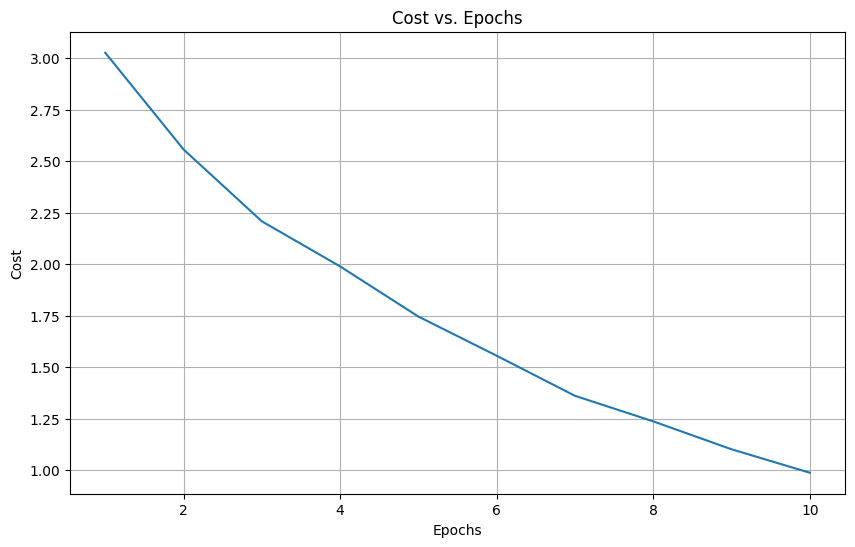

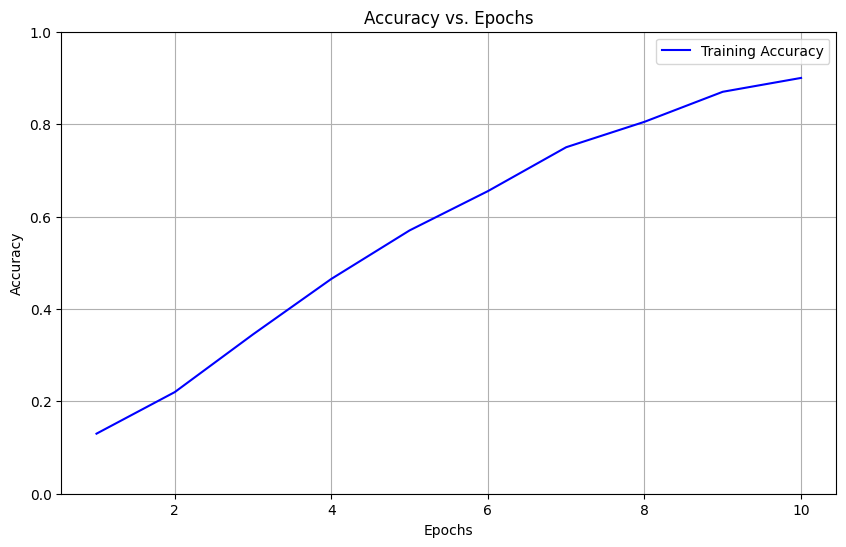


Digit position 1 accuracy: 0.0800

----- Training classifier for digit position 2 -----
Network architecture: [784, 256, 128, 10]
Number of samples: 200, using batch size: 32
Epoch 4/9 - Cost: 1.6839 - Train Acc: 0.6150
Epoch 9/9 - Cost: 0.9315 - Train Acc: 0.9350


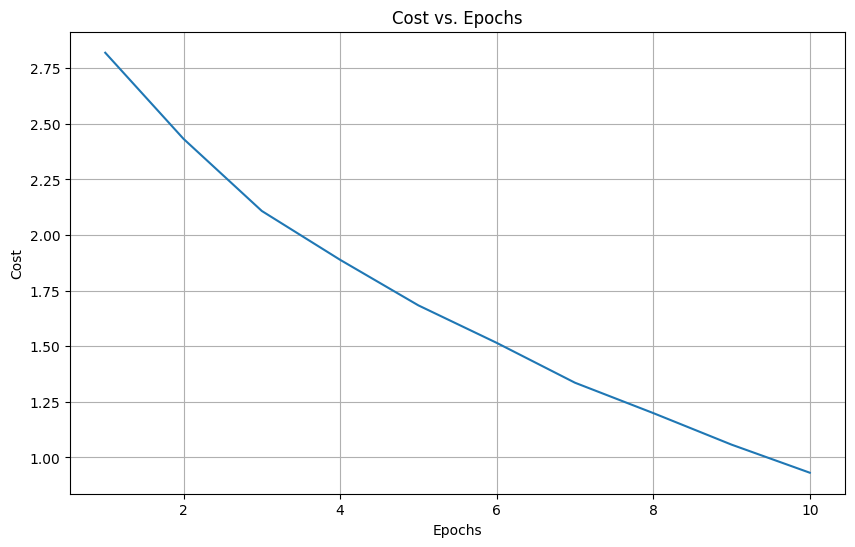

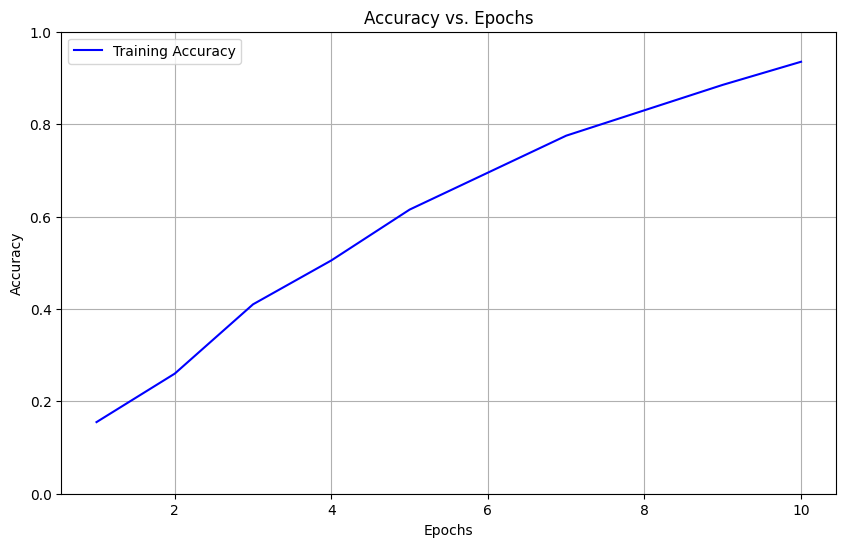


Digit position 2 accuracy: 0.1200

----- Training classifier for digit position 3 -----
Network architecture: [784, 256, 128, 10]
Number of samples: 200, using batch size: 32
Epoch 4/9 - Cost: 1.6960 - Train Acc: 0.5900
Epoch 9/9 - Cost: 0.9952 - Train Acc: 0.8950


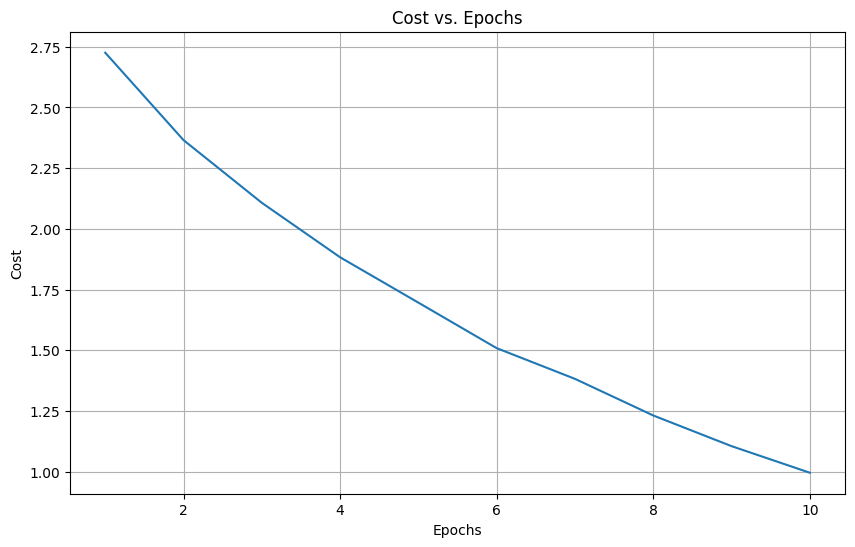

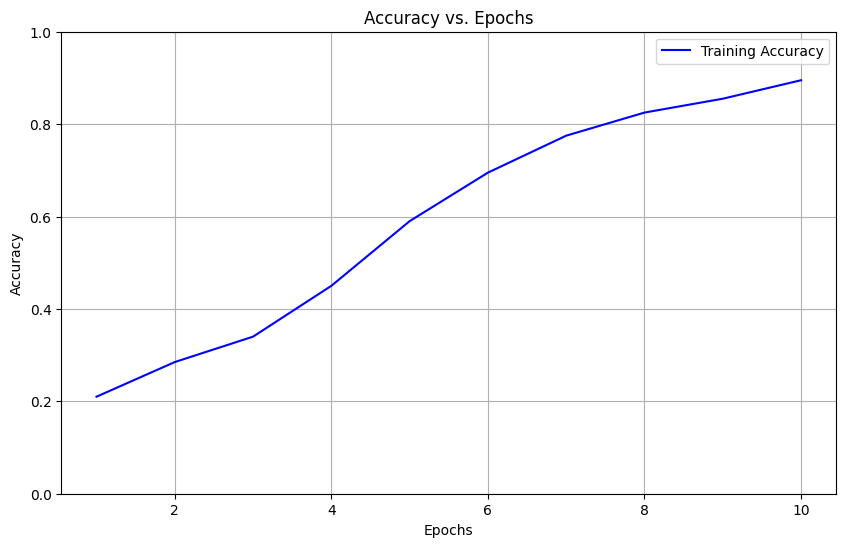


Digit position 3 accuracy: 0.1400

Final overall accuracy: 0.0000
Final digit position 1 accuracy: 0.0800
Final digit position 2 accuracy: 0.1200
Final digit position 3 accuracy: 0.1400


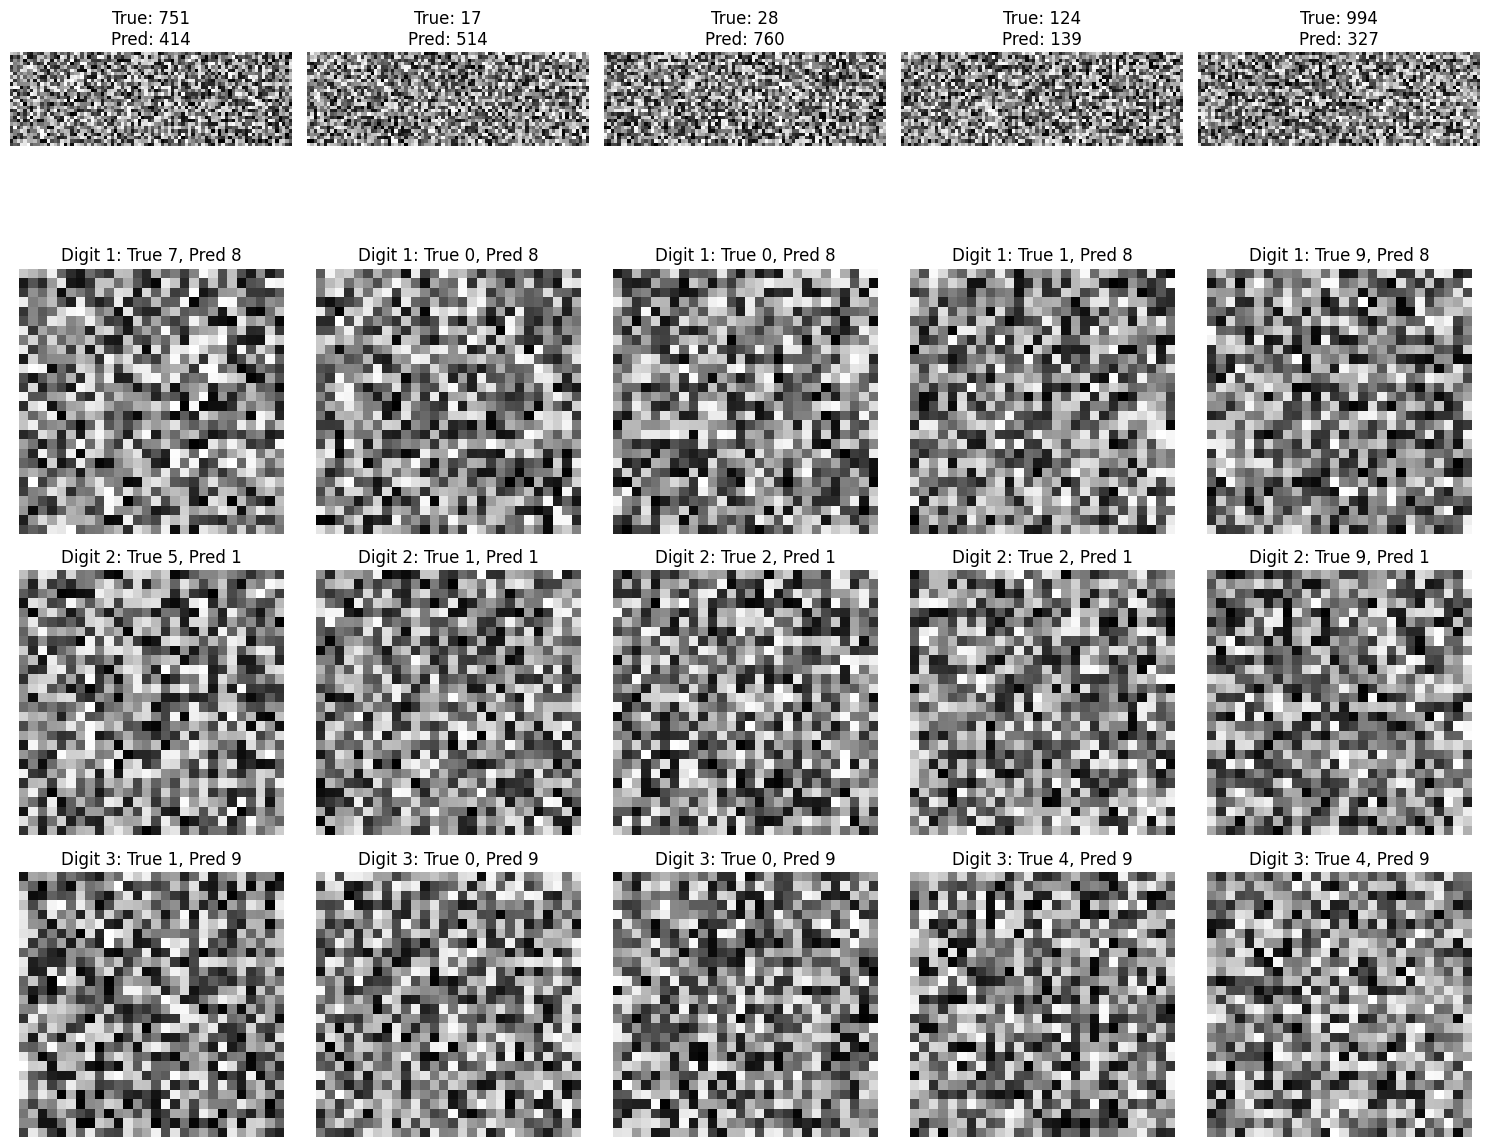

Overall accuracy: 0.0000
Digit position 1 accuracy: 0.0800
Digit position 2 accuracy: 0.1200
Digit position 3 accuracy: 0.1400


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from scipy.ndimage import gaussian_filter

def multi_digit_one_hot_encoding(digit_string):
    """
    Convert a string of multiple digits into a one-hot encoded representation.
    
    Args:
        digit_string (str): A string containing multiple digits (e.g., "945516746")
        
    Returns:
        np.array: A 2D array where each row corresponds to the one-hot encoding of a digit
    """
    # Length of the digit string
    num_digits = len(digit_string)
    
    # Initialize a matrix of zeros with shape (num_digits, 10)
    # Each row will be a one-hot vector for a digit
    one_hot_matrix = np.zeros((num_digits, 10), dtype=np.float32)
    
    # For each digit in the string
    for i, digit in enumerate(digit_string):
        # Convert character to integer
        digit_value = int(digit)
        
        # Set the corresponding position to 1
        one_hot_matrix[i, digit_value] = 1.0
        
    return one_hot_matrix

def load_multi_mnist_safe(train_img_dir, test_img_dir, train_labels_file, test_labels_file):
    """
    Safely load Multi-MNIST data with consistent image sizes
    
    Args:
        train_img_dir: Directory containing training images
        test_img_dir: Directory containing test images
        train_labels_file: CSV file with training labels
        test_labels_file: CSV file with test labels
        
    Returns:
        X_train, X_test, y_train, y_test
    """
    # Read label files
    try:
        train_labels = pd.read_csv(train_labels_file, header=None)
        test_labels = pd.read_csv(test_labels_file, header=None)
        
        # Rename columns for clarity
        train_labels.columns = ['filename', 'label']
        test_labels.columns = ['filename', 'label']
        
        print(f"Read {len(train_labels)} training labels and {len(test_labels)} test labels")
        
        # Create a list of image files that match the labels
        train_files = []
        train_lbls = []
        for _, row in train_labels.iterrows():
            img_path = os.path.join(train_img_dir, row['filename'])
            if os.path.exists(img_path):
                train_files.append(img_path)
                train_lbls.append(row['label'])
            else:
                print(f"Warning: Training image not found: {img_path}")
        
        test_files = []
        test_lbls = []
        for _, row in test_labels.iterrows():
            img_path = os.path.join(test_img_dir, row['filename'])
            if os.path.exists(img_path):
                test_files.append(img_path)
                test_lbls.append(row['label'])
            else:
                print(f"Warning: Test image not found: {img_path}")
        
        # We need to ensure all images have the same size, so let's read one to determine the size
        if train_files:
            sample_img = Image.open(train_files[0]).convert('L')
            img_size = sample_img.size  # Should be (width, height)
            img_shape = img_size[0] * img_size[1]  # Flattened size
            
            # Now preallocate arrays of the correct shape
            X_train = np.zeros((len(train_files), img_size[1], img_size[0]), dtype=np.float32)
            X_test = np.zeros((len(test_files), img_size[1], img_size[0]), dtype=np.float32)
            
            # Load training images (keeping 2D structure for sliding window)
            print("Loading training images...")
            for i, img_path in enumerate(train_files):
                img = Image.open(img_path).convert('L')
                if img.size != img_size:
                    img = img.resize(img_size)  # Resize if needed
                X_train[i] = np.array(img)
            
            # Load test images
            print("Loading test images...")
            for i, img_path in enumerate(test_files):
                img = Image.open(img_path).convert('L')
                if img.size != img_size:
                    img = img.resize(img_size)  # Resize if needed
                X_test[i] = np.array(img)
            
            # Convert labels to numpy arrays
            y_train = np.array(train_lbls)
            y_test = np.array(test_lbls)
            
            print(f"Successfully loaded {len(X_train)} training images and {len(X_test)} test images")
            return X_train, X_test, y_train, y_test
        else:
            print("Error: No valid training images found")
            return None, None, None, None
    
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None, None

def create_digit_segmented_data(multi_digit_images, labels=None, digit_width=28, max_digits=3):
    """
    Create a sliding window-based segmentation of multi-digit images
    
    Args:
        multi_digit_images: Array of images containing multiple digits
        labels: Optional array of corresponding multi-digit labels
        digit_width: Width of each digit (typically 28 pixels for MNIST)
        max_digits: Maximum number of digits to extract
        
    Returns:
        segmented_images: List of arrays containing segmented digit images
        segmented_labels: List of arrays containing the corresponding digit labels
    """
    num_images = len(multi_digit_images)
    image_height = multi_digit_images.shape[1]  # Should be 28 for MNIST
    image_width = multi_digit_images.shape[2]   # Total width of multi-digit image
    
    # Calculate the step size for sliding window based on image width and max digits
    step_size = max(1, (image_width - digit_width) // (max_digits - 1))
    
    # Initialize lists to store segmented digits and their labels
    segmented_images = []
    segmented_labels = []
    
    for i in range(max_digits):
        # Calculate the start position for this digit's window
        start_pos = min(i * step_size, image_width - digit_width)
        
        # Extract the digit segment from each image
        digit_segments = np.zeros((num_images, image_height, digit_width), dtype=np.float32)
        for j in range(num_images):
            digit_segments[j] = multi_digit_images[j, :, start_pos:start_pos+digit_width]
        
        # Flatten the segments for the classifier (if needed)
        flat_segments = digit_segments.reshape(num_images, -1)
        segmented_images.append(flat_segments)
        
        # Extract the corresponding digit label from the multi-digit label (if provided)
        if labels is not None:
            digit_labels = np.zeros(num_images, dtype=int)
            for j in range(num_images):
                label_str = str(labels[j]).zfill(max_digits)
                digit_labels[j] = int(label_str[i]) if i < len(label_str) else 0
            segmented_labels.append(digit_labels)
    
    return segmented_images, segmented_labels

def create_synthetic_multi_mnist(num_samples=100, num_digits=3, digit_width=28):
    """
    Create synthetic multi-digit MNIST-like data by generating random digit patterns
    
    Args:
        num_samples: Number of samples to generate
        num_digits: Number of digits per sample
        digit_width: Width of each digit
        
    Returns:
        X: Array of multi-digit images
        y: Array of corresponding labels
    """
    # Create random data as a fallback
    image_height = 28
    image_width = digit_width * num_digits
    X = np.random.rand(num_samples, image_height, image_width).astype(np.float32)
    y = np.random.randint(0, 10**num_digits, size=num_samples)
    
    print(f"Created {num_samples} synthetic multi-digit images")
    return X, y

def normalization(X):
    """
    Normalize the data by subtracting mean and dividing by standard deviation
    
    Args:
        X: Input data
        
    Returns:
        X_norm: Normalized data
    """
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    if np.isscalar(std_X) and std_X == 0:
        std_X = 1
    elif isinstance(std_X, np.ndarray):
        std_X[std_X == 0] = 1
    X_norm = (X - mean_X) / std_X
    return X_norm

def train_sliding_window_model(MLP_class, X_train, y_train, X_test, y_test, max_digits=3):
    """
    Train a model using sliding window approach for multi-digit recognition
    
    Args:
        MLP_class: Your MLP class
        X_train, y_train: Training data and labels (original multi-digit)
        X_test, y_test: Test data and labels (original multi-digit)
        max_digits: Maximum number of digits
        
    Returns:
        models: List of trained models (one per window position)
    """
    # Segment the training and test images
    print("Segmenting multi-digit images using sliding window...")
    train_segments, train_digit_labels = create_digit_segmented_data(X_train, y_train, max_digits=max_digits)
    test_segments, test_digit_labels = create_digit_segmented_data(X_test, y_test, max_digits=max_digits)
    
    # Train a model for each window position
    models = []
    for digit_pos in range(max_digits):
        print(f"\n----- Training classifier for digit position {digit_pos+1} -----")
        
        # Get data for this digit position
        X_train_digit = train_segments[digit_pos]
        y_train_digit = train_digit_labels[digit_pos]
        X_test_digit = test_segments[digit_pos]
        y_test_digit = test_digit_labels[digit_pos]
        
        # One-hot encode labels
        y_train_one_hot = np.zeros((len(y_train_digit), 10))
        y_train_one_hot[np.arange(len(y_train_digit)), y_train_digit] = 1
        
        # Normalize the data
        X_train_norm = normalization(X_train_digit)
        X_test_norm = normalization(X_test_digit)
        
        # Define network architecture - using your successful MNIST architecture
        input_size = X_train_digit.shape[1]  # Flattened digit segment
        hidden_layers = [256, 128]  # Adjusted for potentially smaller segments
        output_size = 10  # 10 classes for digits 0-9
        layer_dims = [input_size] + hidden_layers + [output_size]
        
        print(f"Network architecture: {layer_dims}")
        
        # Determine appropriate batch size based on dataset size
        # This is critical to prevent ZeroDivisionError
        num_samples = X_train_digit.shape[0]
        batch_size = min(32, max(1, num_samples // 2))  # Ensure at least 2 batches
        print(f"Number of samples: {num_samples}, using batch size: {batch_size}")
        
        # Create and train the model with adapted parameters
        model = MLP_class(
            layer_dims=layer_dims,
            hidden_activations="relu",
            output_activation="softmax",
            initialization="he",
            learning_rate=0.01,      # Lower learning rate for stability
            num_epochs=10,           # Fewer epochs for testing
            batch_size=batch_size,   # Adjusted batch size
            lambd=0.001,
            verbose=True
        )
        
        # Train the model
        model.fit(X_train_norm.T, y_train_one_hot.T)
        
        # Evaluate on test data
        predictions = model.predict(X_test_norm.T)
        accuracy = np.mean(predictions == y_test_digit)
        print(f"Digit position {digit_pos+1} accuracy: {accuracy:.4f}")
        
        models.append(model)
    
    return models, train_segments, test_segments, train_digit_labels, test_digit_labels

def evaluate_sliding_window_model(models, X_test, y_test, max_digits):
    """
    Evaluate the sliding window model on test data
    
    Args:
        models: List of trained models (one per window position)
        X_test: Test multi-digit images
        y_test: Test labels
        max_digits: Maximum number of digits
        
    Returns:
        overall_accuracy: Overall accuracy on multi-digit recognition
        digit_accuracies: Accuracy for each digit position
    """
    # Segment the test images
    test_segments, test_digit_labels = create_digit_segmented_data(X_test, y_test, max_digits=max_digits)
    
    # Evaluate each digit position
    digit_predictions = []
    digit_accuracies = []
    
    for digit_pos in range(max_digits):
        # Get data for this digit position
        X_test_digit = test_segments[digit_pos]
        y_test_digit = test_digit_labels[digit_pos]
        
        # Normalize the data
        X_test_norm = normalization(X_test_digit)
        
        # Get predictions from the model
        predictions = models[digit_pos].predict(X_test_norm.T)
        
        # Calculate accuracy for this position
        accuracy = np.mean(predictions == y_test_digit)
        digit_accuracies.append(accuracy)
        
        # Store predictions
        digit_predictions.append(predictions)
    
    # Combine predictions into full numbers
    full_predictions = []
    for i in range(len(y_test)):
        num_str = ''.join([str(digit_predictions[j][i]) for j in range(max_digits)])
        full_predictions.append(int(num_str))
    
    # Calculate overall accuracy
    overall_accuracy = np.mean(np.array(full_predictions) == y_test)
    
    return overall_accuracy, digit_accuracies, full_predictions

def visualize_sliding_window_predictions(models, X_test, y_test, max_digits, num_samples=5):
    """
    Visualize predictions of the sliding window model
    
    Args:
        models: List of trained models
        X_test: Test multi-digit images
        y_test: Test labels
        max_digits: Maximum number of digits
        num_samples: Number of samples to visualize
    """
    # Segment test images
    test_segments, _ = create_digit_segmented_data(X_test, y_test, max_digits=max_digits)
    
    # Get predictions using evaluate function
    overall_accuracy, digit_accuracies, full_predictions = evaluate_sliding_window_model(
        models, X_test, y_test, max_digits)
    
    # Random indices for visualization
    indices = np.random.choice(len(X_test), min(num_samples, len(X_test)), replace=False)
    
    # Visualize full images and digit segments
    fig = plt.figure(figsize=(15, 3 * (max_digits + 1)))
    
    for i, idx in enumerate(indices):
        # Full image on top row
        plt.subplot(max_digits + 1, len(indices), i + 1)
        plt.imshow(X_test[idx], cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {full_predictions[idx]}")
        plt.axis('off')
        
        # Segmented digits on rows below
        for j in range(max_digits):
            plt.subplot(max_digits + 1, len(indices), (j + 1) * len(indices) + i + 1)
            
            # Reshape assuming 28x28 segments (adjust if different)
            segment_height = int(np.sqrt(test_segments[j][idx].shape[0]))
            segment_width = test_segments[j][idx].shape[0] // segment_height
            segment_image = test_segments[j][idx].reshape(segment_height, segment_width)
            
            plt.imshow(segment_image, cmap='gray')
            
            # Get the prediction for this segment
            segment_norm = normalization(test_segments[j][idx].reshape(1, -1))
            pred = models[j].predict(segment_norm.T)[0]
            
            # Get true digit
            true_digit = int(str(y_test[idx]).zfill(max_digits)[j]) if j < len(str(y_test[idx])) else 0
            
            plt.title(f"Digit {j+1}: True {true_digit}, Pred {pred}")
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Overall accuracy: {overall_accuracy:.4f}")
    for i, acc in enumerate(digit_accuracies):
        print(f"Digit position {i+1} accuracy: {acc:.4f}")

def train_multi_mnist_sliding_window(MLP_class, use_synthetic_data=True, max_digits=3):
    """
    Main function to train a multi-digit MNIST classifier using sliding window approach
    
    Args:
        MLP_class: Your MLP class
        use_synthetic_data: Whether to use synthetic data or load real data
        max_digits: Maximum number of digits
        
    Returns:
        models: List of trained models
    """
    if use_synthetic_data:
        # Create synthetic multi-digit MNIST data
        print("Creating synthetic multi-digit MNIST data...")
        X_train, y_train = create_synthetic_multi_mnist(num_samples=200, num_digits=max_digits)
        X_test, y_test = create_synthetic_multi_mnist(num_samples=50, num_digits=max_digits)
    else:
        # Try to load real data
        print("Loading real multi-digit MNIST data...")
        try:
            train_img_dir = "multi-mnist/examples/train"
            test_img_dir = "multi-mnist/examples/test"
            train_labels_file = "trainlabels.csv"
            test_labels_file = "testlabels.csv"
            
            X_train, X_test, y_train, y_test = load_multi_mnist_safe(
                train_img_dir, test_img_dir, train_labels_file, test_labels_file)
            
            if X_train is None:
                raise ValueError("No valid training data found")
                
        except Exception as e:
            print(f"Loading real data failed: {e}. Falling back to synthetic data.")
            X_train, y_train = create_synthetic_multi_mnist(num_samples=200, num_digits=max_digits)
            X_test, y_test = create_synthetic_multi_mnist(num_samples=50, num_digits=max_digits)
    
    # Train models using sliding window approach
    models, train_segments, test_segments, train_labels, test_labels = train_sliding_window_model(
        MLP_class, X_train, y_train, X_test, y_test, max_digits)
    
    # Evaluate models
    overall_accuracy, digit_accuracies, _ = evaluate_sliding_window_model(
        models, X_test, y_test, max_digits)
    
    print(f"\nFinal overall accuracy: {overall_accuracy:.4f}")
    for i, acc in enumerate(digit_accuracies):
        print(f"Final digit position {i+1} accuracy: {acc:.4f}")
    
    # Visualize some predictions
    visualize_sliding_window_predictions(models, X_test, y_test, max_digits)
    
    return models

# Usage:
# from your_notebook import MLP
models = train_multi_mnist_sliding_window(MLP, use_synthetic_data=True, max_digits=3)

In [ ]:
# def visualize_emnist_predictions(model, X, y, num_samples=5, letters_only=False):
#     """
#     Visualize model predictions on random EMNIST samples
#     """
#     indices = np.random.choice(X.shape[0], num_samples, replace=False)
    
#     # Define label mapping based on dataset variant
#     if letters_only:
#         # For letters A-Z (0-25)
#         label_map = {i: chr(i + 65) for i in range(26)}
#     else:
#         # For balanced set (digits + uppercase + lowercase)
#         # 0-9: digits
#         label_map = {i: str(i) for i in range(10)}
#         # 10-35: uppercase letters
#         label_map.update({i+10: chr(i+65) for i in range(26)})
#         # 36-46: lowercase letters (not all are included in balanced)
#         for i in range(11):
#             if i+36 < 47:  # Balanced has 47 classes
#                 label_map[i+36] = chr(i+97)
    
#     plt.figure(figsize=(15, 3))
#     for i, idx in enumerate(indices):
#         # Get sample and prediction
#         sample = X[idx]
#         true_label = y[idx] if len(y.shape) == 1 else np.argmax(y[idx])
        
#         # Make prediction
#         sample_reshaped = sample.reshape(-1, 1).T
#         pred = model.predict(sample_reshaped)[0]
        
#         # Map numeric labels to actual characters
#         true_char = label_map.get(true_label, str(true_label))
#         pred_char = label_map.get(pred, str(pred))
        
#         # Display
#         plt.subplot(1, num_samples, i+1)
#         # EMNIST images need to be rotated and flipped for proper display
#         img = sample.reshape(28, 28)
#         img = np.fliplr(np.rot90(img, 3))  # Adjust for EMNIST format
#         plt.imshow(img, cmap='gray')
#         plt.title(f"True: {true_char}, Pred: {pred_char}")
#         plt.axis('off')
    
#     plt.tight_layout()
#     plt.show()

In [ ]:
# def test_with_emnist(model=None, letters_only=False):
#     """
#     Test the model with the EMNIST dataset using torchvision
    
#     Parameters:
#     model -- Optional pre-trained model (if None, a new model will be trained)
#     letters_only -- If True, use only letters, otherwise use balanced set
    
#     Returns:
#     emnist_model -- Trained model on EMNIST
#     """
#     try:
#         # Try to import torchvision
#         import torchvision
#         import torchvision.transforms as transforms
#         import torch
#         import time
        
#         print("Loading EMNIST dataset...")
#         start_time = time.time()
        
#         # Choose EMNIST variant
#         split = 'letters' if letters_only else 'balanced'
        
#         # Set up transforms
#         transform = transforms.Compose([
#             transforms.ToTensor(),
#             transforms.Normalize((0.1751,), (0.3332,))  # EMNIST mean and std
#         ])
        
#         # Download and load EMNIST
#         train_dataset = torchvision.datasets.EMNIST(
#             root='./data', 
#             split=split, 
#             train=True,
#             download=True, 
#             transform=transform
#         )
        
#         test_dataset = torchvision.datasets.EMNIST(
#             root='./data', 
#             split=split, 
#             train=False,
#             download=True, 
#             transform=transform
#         )
        
#         # Convert to numpy arrays
#         X_train = []
#         y_train = []
#         for images, labels in torch.utils.data.DataLoader(train_dataset, batch_size=1000):
#             X_train.append(images.numpy().reshape(-1, 784))
#             y_train.append(labels.numpy())
        
#         X_test = []
#         y_test = []
#         for images, labels in torch.utils.data.DataLoader(test_dataset, batch_size=1000):
#             X_test.append(images.numpy().reshape(-1, 784))
#             y_test.append(labels.numpy())
        
#         X_train = np.concatenate(X_train)
#         y_train = np.concatenate(y_train)
#         X_test = np.concatenate(X_test)
#         y_test = np.concatenate(y_test)
        
#         # Adjust class labels if necessary
#         if letters_only:
#             # EMNIST letters are 1-26, adjust to 0-25
#             y_train = y_train - 1
#             y_test = y_test - 1
#             num_classes = 26
#         else:
#             # Balanced set has 47 classes
#             num_classes = 47
        
#         print(f"Dataset loaded in {time.time() - start_time:.2f} seconds")
#         print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
#         print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
        
#         # Use existing model or create new one
#         if model is None:
#             # Define network architecture
#             input_size = X_train.shape[1]
#             hidden_layers = [512 ,256, 128]  # Larger network for more complex dataset
#             output_size = num_classes
#             layer_dims = [input_size] + hidden_layers + [output_size]
            
#             print(f"Network architecture: {layer_dims}")
            
#             # Create model
#             emnist_model = MLP(
#                 layer_dims=layer_dims,
#                 hidden_activations="relu",
#                 output_activation="softmax",
#                 initialization="he",
#                 learning_rate=0.005,
#                 num_epochs=20,  # Reduced for time
#                 batch_size=256,
#                 lambd=0.001,
#                 verbose=True
#             )
            
#             # Train model
#             print("Training model on EMNIST...")
#             y_train_one_hot = one_hot_encode(y_train, num_classes)
#             emnist_model.fit(X_train.T, y_train_one_hot.T)
#         else:
#             emnist_model = model
        
#         # Evaluate model
#         test_accuracy = emnist_model.evaluate(X_test, y_test)
#         print(f"EMNIST test accuracy: {test_accuracy:.4f}")
        
#         # Visualize predictions
#         visualize_emnist_predictions(emnist_model, X_test, y_test, letters_only=letters_only)
        
#         # Create confusion matrix
#         create_confusion_matrix(emnist_model, X_test, y_test)
        
#         return emnist_model
        
#     except ImportError as e:
#         print(f"Error: {e}")
#         print("To use this function, please install PyTorch and torchvision:")
#         print("pip install torch torchvision")
        
#         # Fall back to a smaller synthetic dataset
#         print("Falling back to a synthetic EMNIST-like dataset...")
        
#         num_classes = 26 if letters_only else 47
        
#         # Create synthetic data
#         np.random.seed(42)
#         X_train = np.random.randn(5000, 784)
#         y_train = np.random.randint(0, num_classes, size=5000)
#         X_test = np.random.randn(1000, 784)
#         y_test = np.random.randint(0, num_classes, size=1000)
        
#         # Create and train a small model
#         input_size = 784
#         hidden_layers = [128, 64]
#         layer_dims = [input_size] + hidden_layers + [num_classes]
        
#         emnist_model = MLP(
#             layer_dims=layer_dims,
#             hidden_activations="relu",
#             output_activation="softmax",
#             initialization="he",
#             learning_rate=0.01,
#             num_epochs=10,
#             batch_size=128,
#             lambd=0.001,
#             verbose=True
#         )
        
#         # Train on synthetic data
#         y_train_one_hot = one_hot_encode(y_train, num_classes)
#         emnist_model.fit(X_train.T, y_train_one_hot.T)
        
#         return emnist_model


# # Update main function to include EMNIST testing option
# def main(test_emnist=False, emnist_letters_only=True):
#     # Load and preprocess MNIST data
#     print("Loading MNIST dataset...")
#     X, y = load_mnist()
#     X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
#     # Define network architecture
#     input_size = X_train.shape[1]  # 784 for MNIST
#     hidden_layers = [128, 64]
#     output_size = 10  # 10 classes for MNIST
#     layer_dims = [input_size] + hidden_layers + [output_size]
    
#     print(f"Network architecture: {layer_dims}")
    
#     # Create and train the model
#     model = MLP(
#         layer_dims=layer_dims,
#         hidden_activations="relu",
#         output_activation="softmax",
#         initialization="he",
#         learning_rate=0.01,
#         num_epochs=30,
#         batch_size=128,
#         lambd=0.001,
#         verbose=True
#     )
    
#     print("Training the model...")
#     model.fit(X_train.T, one_hot_encode(y_train, 10).T)
    
#     # Evaluate the model
#     train_accuracy = model.evaluate(X_train, y_train)
#     test_accuracy = model.evaluate(X_test, y_test)
    
#     print(f"Training accuracy: {train_accuracy:.4f}")
#     print(f"Test accuracy: {test_accuracy:.4f}")
    
#     # Plot the cost
#     model.plot_cost()
    
#     # Visualize some predictions
#     visualize_predictions(model, X_test, y_test)
    
#     # Create and visualize confusion matrix
#     from sklearn.metrics import confusion_matrix
#     import seaborn as sns
    
#     # Get predictions
#     y_pred = model.predict(X_test.T)
    
#     # Create confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
    
#     # Plot confusion matrix
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.show()
    
#     # Run tests
#     print("\nRunning tests to verify implementation...")
#     run_tests(model)
    
#     # Test with EMNIST if requested
#     if test_emnist:
#         print("\n===== Testing with EMNIST dataset =====")
#         emnist_model = test_with_emnist(None, letters_only=emnist_letters_only)
#         return model, emnist_model
    
#     return model

# if __name__ == "__main__":
#     main(test_emnist=True)  # Set to True to also test with EMNIST